<strong><h1>Évaluations de Performance et d'Implication des Employés</h1></strong>

  <p>Ce notebook a pour objectif d'explorer en profondeur la base de données intitulée "manager_survey_data.csv", qui consigne les évaluations les plus récentes effectuées par les managers pour chaque employé en février 2015. Les données capturées incluent l'identifiant unique de chaque employé (EmployeeID), l'évaluation de son implication dans le travail (JobInvolvement), et l'évaluation de son niveau de performance annuel pour l'entreprise (PerformanceRating).</p>
  
  <h2>Objectif</h2>

  <p>Cette base de données recueille les évaluations les plus récentes réalisées par les managers pour chaque employé en février 2015. Les évaluations portent sur l'aspect clés tauxEvaluation.</p>

  <h2>Description des données</h2>

  <p>La base de données "Dernière Évaluation du Manager (Février 2015)" comprend trois principales catégories d'informations. Tout d'abord, l'EmployeeID représente l'identifiant numérique unique attribué à chaque employé au sein de l'organisation. Ensuite, la variable JobInvolvement est catégorique, évaluant l'implication de l'employé dans son travail avec des niveaux allant de "Faible" à "Très Importante," notés de 1 à 4. De même, la dimension PerformanceRating offre une évaluation catégorique du niveau de performance annuel de l'employé, avec des notations de "Faible" à "Au-delà des Attentes," également notées de 1 à 4. Ces données, datant de février 2015, constituent une ressource cruciale pour analyser et comprendre les dimensions clés de la contribution des employés, facilitant ainsi des décisions informées en matière de gestion des ressources humaines et de développement professionnel au sein de l'entreprise.</p>

### **Import des bibliothèques**

In [ ]:
import pandas as pd
from work_tools import * # Ici se trouvent nos propres fonctions

### **Import et Consult des Fichiers**

In [2]:
# Charger les données depuis le fichier CSV 'manager_survey_data.csv'
manager_survey = pd.read_csv('./manager_survey_data.csv')

In [3]:
# Afficher les dix premières lignes du DataFrame 'manager_survey'
manager_survey.head(10)

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3
5,6,3,3
6,7,3,4
7,8,3,4
8,9,3,4
9,10,3,3


In [4]:
# Afficher les dimensions du DataFrame 'manager_survey' (nombre de lignes et de colonnes)

manager_survey.shape

(4410, 3)

  <p>Les dimensions (shape) (4410, 3), représentent le nombre de lignes et de colonnes du DataFrame. En particulier :</p>

  <ul>
    <li>Pour le DataFrame 'manager_survey': Il comporte également 4410 lignes et 3 colonnes.</li>
  </ul>

  <p>Ces nombres indiquent que chaque DataFrame contient 4410 enregistrements (entrées ou observations) et 3 variables (attributs ou colonnes).</p>

In [5]:
# Affiche des informations essentielles sur la structure et les types de données dans la base de données
# Cela inclut le nombre total d'entrées, les types de données de chaque colonne .
manager_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   EmployeeID         4410 non-null   int64
 1   JobInvolvement     4410 non-null   int64
 2   PerformanceRating  4410 non-null   int64
dtypes: int64(3)
memory usage: 103.5 KB


In [6]:
# Génère un résumé statistique des variables numériques de la base de données
# La transposition (T) est utilisée pour afficher les statistiques par colonne plutôt que par ligne.
# Cela inclut la moyenne, l'écart-type, les valeurs minimum et maximum, ainsi que les quartiles.
manager_survey.describe().T

,count,mean,std,min,25%,50%,75%,max
EmployeeID,4410.0,2205.500000,1273.201673,1.0,1103.25,2205.5,3307.75,4410.0
JobInvolvement,4410.0,2.729932,0.711400,1.0,2.00,3.0,3.00,4.0
PerformanceRating,4410.0,3.153741,0.360742,3.0,3.00,3.0,3.00,4.0


Vérification des Valeurs Nulles dans les Colonnes à Manipuler

In [7]:
# Afficher le nombre de valeurs nulles par colonne dans le DataFrame 'manager_survey'

manager_survey.isna().sum()

EmployeeID           0
JobInvolvement       0
PerformanceRating    0
dtype: int64

Super! Aucune valeur nulle existe dans la dataset

In [8]:
# La fonction check_for_duplicates est  définie  dans le fichier work_tools.py et elle devrait effectuer une vérification des doublons dans le DataFrame manager_survey.
check_for_duplicates(manager_survey)

Empty DataFrame
Columns: [EmployeeID, JobInvolvement, PerformanceRating]
Index: []
Number of duplicates: 0
The DataFrame does not contain duplicates.


#### **Visualisation des données**

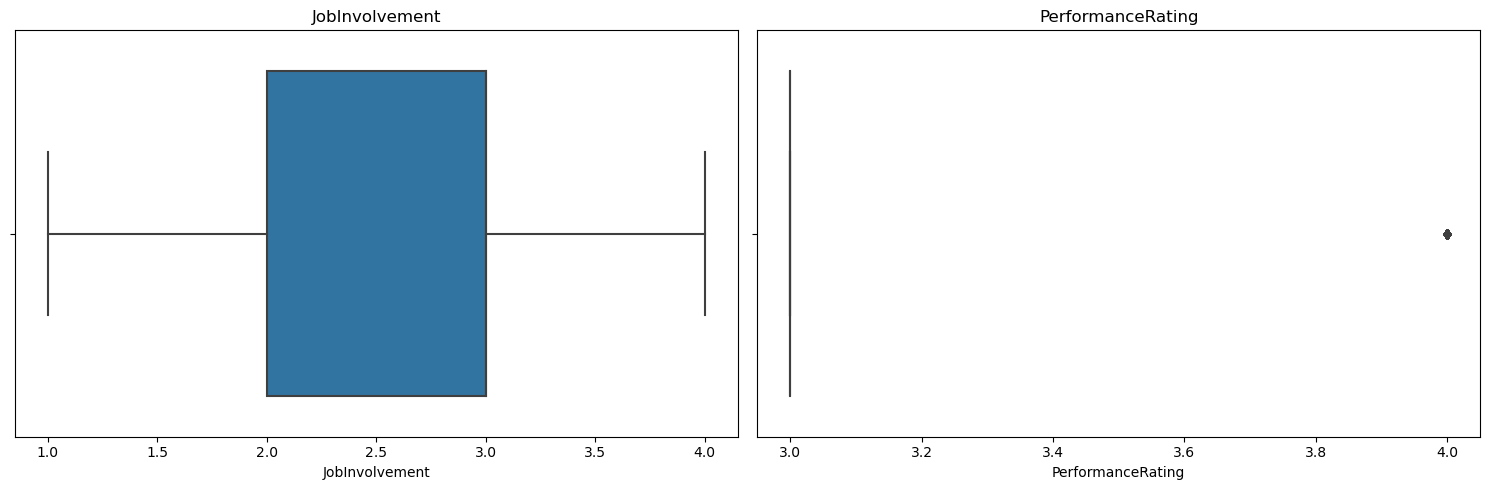

In [11]:
# Utilise la fonction visualize_outliers pour générer des visualisations graphiques des éventuels outliers
# dans les variables à partir de la deuxième colonne (index 1) de la base de données.
visualize_outliers(manager_survey.iloc[:,1:])

==> le résultat de visualize_outliers(manager_survey.iloc[:, 1:]) ne montre pas de points ou de valeurs aberrantes (outliers), cela indique que, visuellement, il n'y a pas de points qui se démarquent de manière significative par rapport au reste des données dans les variables analysées

In [12]:
# Applique la fonction z_scores pour calculer les scores Z (z-scores) des variables numériques dans la base de données.
# La boucle for parcourt chaque colonne à partir de la deuxième (index 1) jusqu'à la fin des colonnes.
for col in manager_survey[1:]:
    z_scores(manager_survey,col)

Potential Outliers in EmployeeID: 0
Series([], Name: EmployeeID, dtype: int64)
Potential Outliers in JobInvolvement: 0
Series([], Name: JobInvolvement, dtype: int64)
Potential Outliers in PerformanceRating: 0
Series([], Name: PerformanceRating, dtype: int64)


* Cette opération génère les scores Z, qui sont des mesures standardisées de la déviation d'une valeur par rapport à la moyenne, facilitant ainsi la détection des valeurs aberrantes. Cela rend le code plus compréhensible et souligne le but de cette étape dans le processus d'analyse des données.

==>  les résultats indiquent une absence d'outliers dans les variables analysées. Cela suggère que les données sont relativement homogènes, sans valeurs extrêmes, ce qui peut être rassurant lors de l'analyse des performances et de l'implication des employés. Il est important de noter que la détection d'outliers dépend souvent de seuils spécifiques, et l'absence d'outliers peut également être une caractéristique des données.

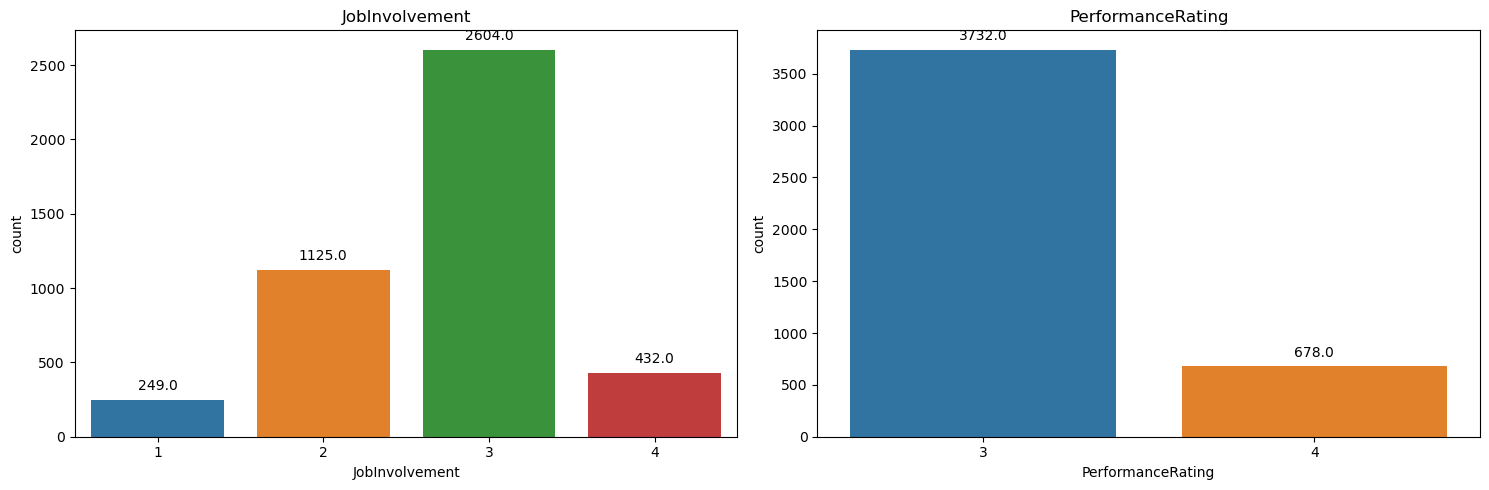

In [13]:
# Utilise la fonction visualize_frequency pour générer des diagrammes de fréquence des variables à partir de la deuxième colonne (index 1) de la base de données.

visualize_frequency(manager_survey,manager_survey.columns[1:])

==> Le résultat de la visualisation de fréquence pour les variables JobInvolvement (implication dans le travail) et PerformanceRating (niveau de performance annuel) donne une idée du nombre d'occurrences de chaque évaluation respective. Cela permet d'observer la distribution de ces évaluations au sein de la population d'employés.

In [14]:
# Utilise la fonction create_average_variable pour calculer la moyenne des évaluations d'implication dans le travail (JobInvolvement)
# et de performance annuelle (PerformanceRating) pour chaque employé. La nouvelle variable 'tauxEvaluation' est créée.
employee_survey = create_average_variable(manager_survey, manager_survey.columns[1:], 'tauxEvaluation')
employee_survey

,EmployeeID,JobInvolvement,PerformanceRating,tauxEvaluation
0,1,3,3,3.0
1,2,2,4,3.0
2,3,3,3,3.0
3,4,2,3,2.5
4,5,3,3,3.0
...,...,...,...,...
4405,4406,3,3,3.0
4406,4407,2,3,2.5
4407,4408,3,4,3.5
4408,4409,2,3,2.5


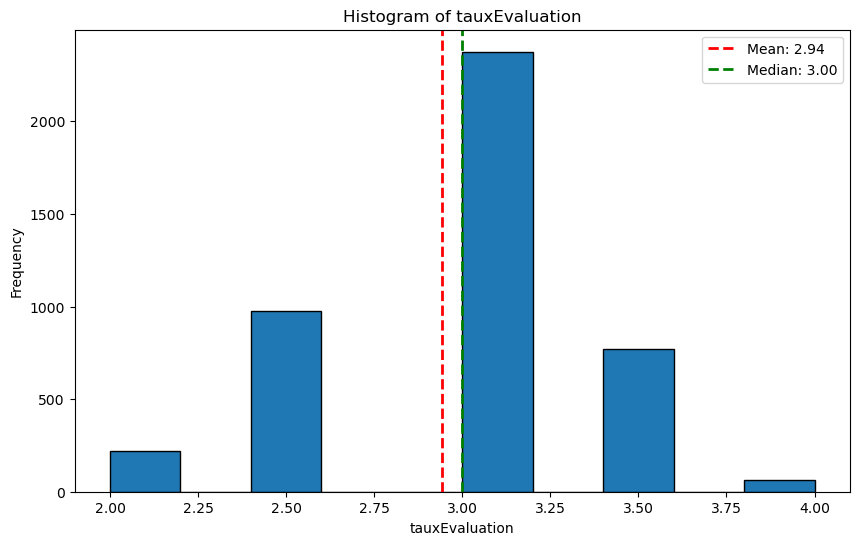

In [15]:
# Utilise la fonction create_annotated_histogram pour générer un histogramme annoté de la nouvelle variable 'tauxEvaluation'
# Cette visualisation permet de comprendre la distribution des taux d'évaluation agrégés parmi les employés.
create_annotated_histogram(manager_survey, manager_survey.columns[-1])


==>L'histogramme annoté de la variable 'tauxEvaluation' présente une illustration graphique de la dispersion des taux d'évaluation agrégés parmi les employés. L'emplacement des annotations sur l'histogramme peut fournir des indications sur la concentration des taux d'évaluation, tendant à être centrée autour de 3, qui est approximativement équidistant de la moyenne et de la médiane. Cette disposition suggère une concentration significative des taux d'évaluation à ce niveau spécifique, indiquant une cohérence relative dans les évaluations globales des employés. Cependant, des variations peuvent être présentes, et l'analyse approfondie de cette distribution peut révéler des informations essentielles sur la diversité des performances et de l'implication au sein de l'effectif.

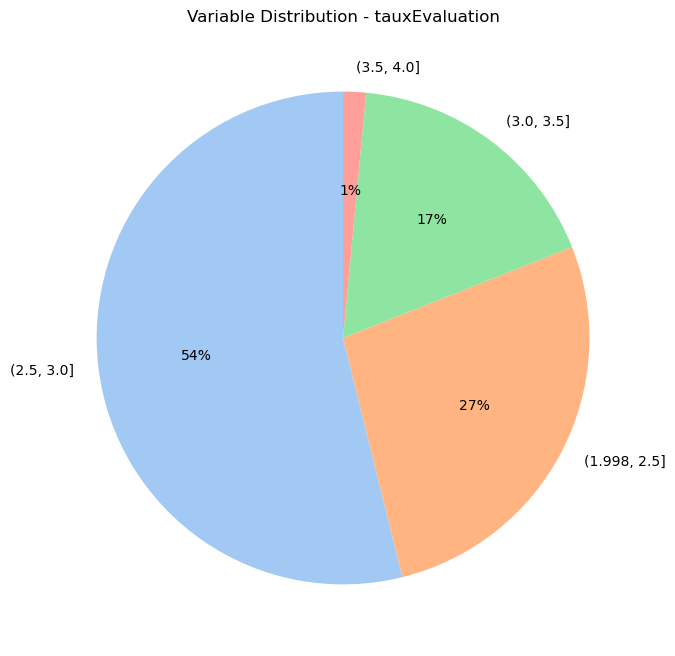

In [21]:
# Utilise la fonction visualize_variable_pie pour générer un diagramme circulaire de la variable 'tauxEvaluation'
# avec une classification en 4 catégories distinctes. Cela permet une visualisation claire de la répartition
# des taux d'évaluation agrégés parmi les employés.
visualize_variable_pie(manager_survey, manager_survey.columns[-1], num_categories=4)


==>cette analyse catégorique offre une vision segmentée des taux d'évaluation agrégés, ces catégories reflètent la répartition des taux d'évaluation agrégés parmi les employés, offrant une perspective segmentée de la performance et de l'implication au sein de l'organisation.

Suppression des Colonnes Indésirables

In [17]:
# Crée un nouveau dataframe 'data' en supprimant les colonnes correspondant aux évaluations d'implication et de performance
# Cela permet de se concentrer sur les données essentielles telles que l'identifiant de l'employé et la variable agrégée 'tauxEvaluation'.
data = manager_survey.drop(manager_survey.columns[1:-1], axis=1)
data

,EmployeeID,tauxEvaluation
0,1,3.0
1,2,3.0
2,3,3.0
3,4,2.5
4,5,3.0
...,...,...
4405,4406,3.0
4406,4407,2.5
4407,4408,3.5
4408,4409,2.5


* créer un nouveau dataframe appelé 'data' en éliminant les colonnes associées aux évaluations d'implication et de performance. Cette étape simplifie le dataframe pour inclure uniquement des informations essentielles telles que l'identifiant de l'employé et la variable agrégée 'tauxEvaluation', facilitant ainsi une analyse plus spécifique de ces données centrales.

### **Export Dataset**
Exportation du DataFrame 'manager_survey' vers un fichier CSV

In [18]:
# Exporte le dataframe 'data' vers un fichier CSV nommé 'new_manager_survey.csv' sans inclure les index.
data.to_csv('./new_manager_survey.csv', index=False)
